# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chul'man
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | college
Processing Record 6 of Set 1 | mugia
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | morondava
Processing Record 9 of Set 1 | bukoba
Processing Record 10 of Set 1 | gaalkacyo
Processing Record 11 of Set 1 | priyutnoye
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | george town
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | maisi
Processing Record 21 of Set 1 | butte
Processing Record 22 of Set 1 | bikenibeu village
Processing 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chul'man,56.8479,124.9104,7.67,80,100,3.58,RU,1727405691
1,olonkinbyen,70.9221,-8.7187,-1.53,94,100,12.55,SJ,1727405692
2,blackmans bay,-43.0167,147.3167,15.96,53,21,1.53,AU,1727405693
3,hasaki,35.7333,140.8333,24.35,88,100,4.99,JP,1727405694
4,college,64.8569,-147.8028,6.99,80,75,2.57,US,1727405696


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chul'man,56.8479,124.9104,7.67,80,100,3.58,RU,1727405691
1,olonkinbyen,70.9221,-8.7187,-1.53,94,100,12.55,SJ,1727405692
2,blackmans bay,-43.0167,147.3167,15.96,53,21,1.53,AU,1727405693
3,hasaki,35.7333,140.8333,24.35,88,100,4.99,JP,1727405694
4,college,64.8569,-147.8028,6.99,80,75,2.57,US,1727405696


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

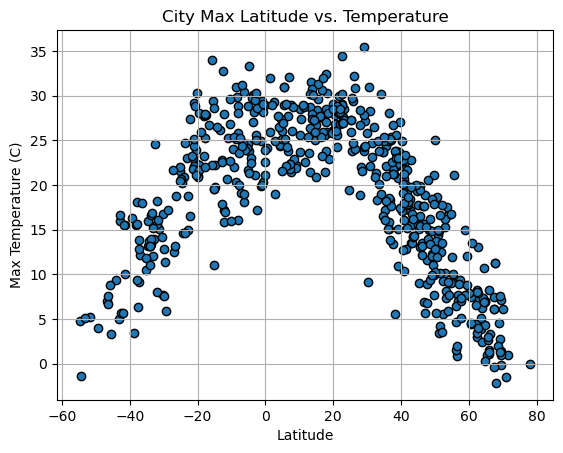

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

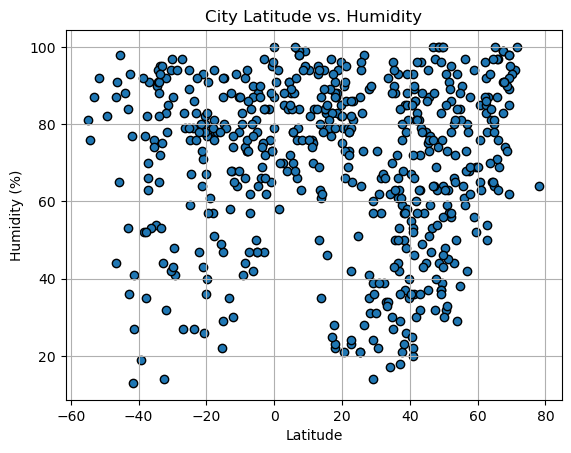

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

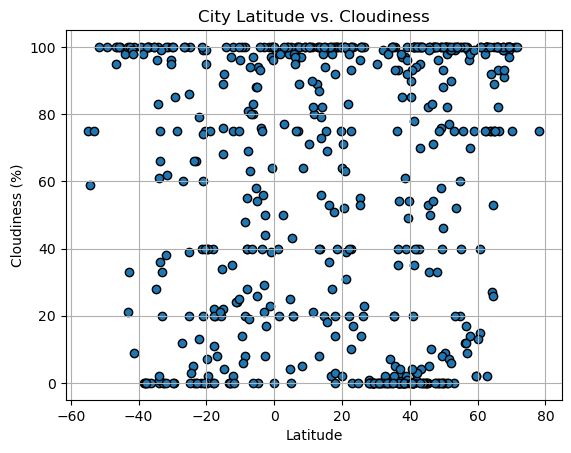

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

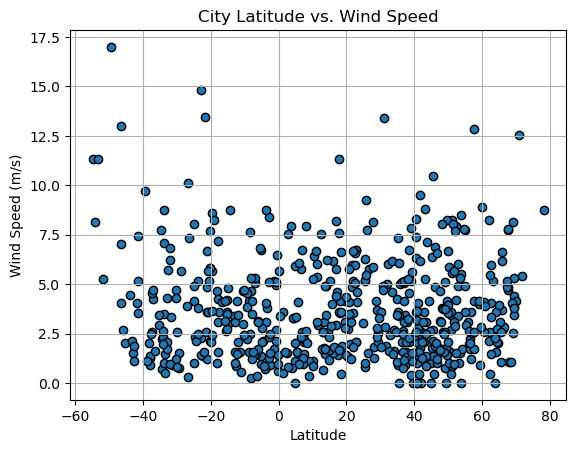

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regress(x, y, title, text_coordinates):
   
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.title(title)
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()
    

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chul'man,56.8479,124.9104,7.67,80,100,3.58,RU,1727405691
1,olonkinbyen,70.9221,-8.7187,-1.53,94,100,12.55,SJ,1727405692
3,hasaki,35.7333,140.8333,24.35,88,100,4.99,JP,1727405694
4,college,64.8569,-147.8028,6.99,80,75,2.57,US,1727405696
5,mugia,43.1041,-9.2179,15.51,72,70,8.81,ES,1727405697


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,blackmans bay,-43.0167,147.3167,15.96,53,21,1.53,AU,1727405693
7,morondava,-20.2833,44.2833,22.36,80,0,2.13,MG,1727405699
8,bukoba,-1.3317,31.8122,19.85,76,23,1.74,TZ,1727405700
11,adamstown,-25.0660,-130.1015,21.52,89,86,4.12,PN,1727405703
14,waitangi,-43.9535,-176.5597,9.34,88,98,4.47,NZ,1727405707


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7336279112382006


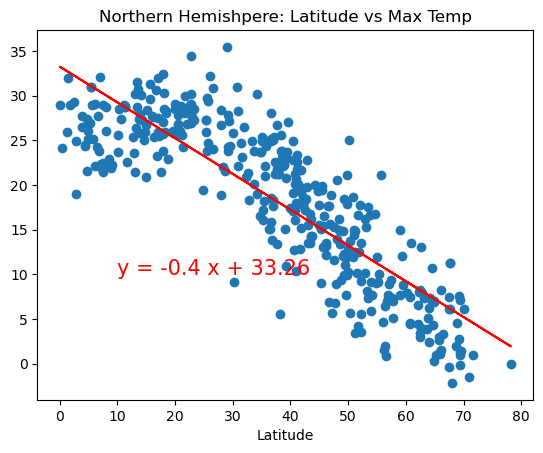

In [31]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
title = 'Northern Hemishpere: Latitude vs Max Temp'
text_coordinates = (10,10)
plot_linear_regress(x, y, title, text_coordinates)
#WHY ARE TITLES NOT SHOWING UP?

The r-squared is: 0.603648042514752


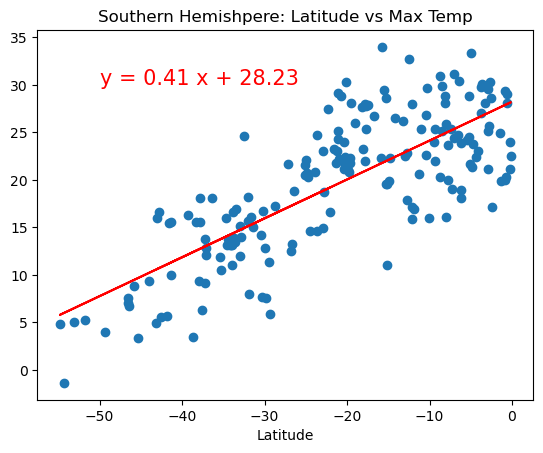

In [33]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
title = 'Southern Hemishpere: Latitude vs Max Temp'
text_coordinates = (-50,30)
plot_linear_regress(x, y,title, text_coordinates)

**Discussion about the linear relationship:** 
- An R^2 value of 0.64 suggests a good relationship between northern hemishpere latitude and maximum temperature. This means that as latitude changes, the maximum temperature tends to change as well, but there are likely other factors influencing temperature that the model does not account for. Since 64% of the variability is explained by latitude, the remaining 36% of the variability in maximum temperature is due to other factors or randomness.
- For the southern hemishpere an R^2 value of 0.42 suggests a moderate relationship between southern hemisphere latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0006051394795153281


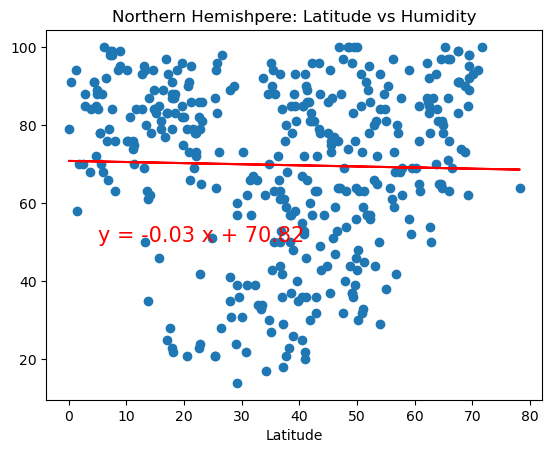

In [35]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
title = 'Northern Hemishpere: Latitude vs Humidity'
text_coordinates = (5,50)
plot_linear_regress(x, y, title, text_coordinates)

The r-squared is: 0.003940689280858655


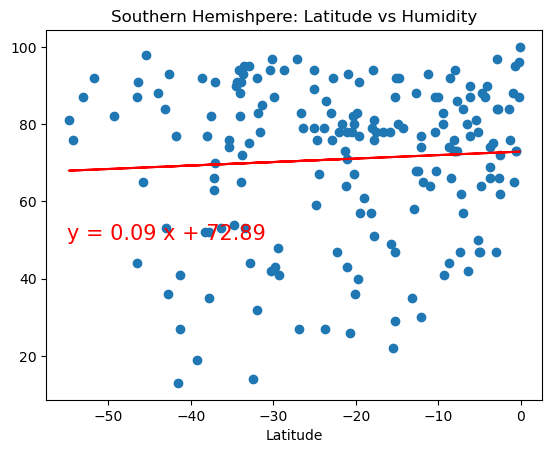

In [39]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
title = 'Southern Hemishpere: Latitude vs Humidity'
text_coordinates = (-55,50)
plot_linear_regress(x, y, title, text_coordinates)

**Discussion about the linear relationship:** 
- An R^2 value of 0.0096 for northern hemisphere and 0.00008 for the southern hemisphere suggests a very weak relationship between latitude and humidity. This means that as latitude changes, the humidity tends to not change for both hemispheres. The 99% of remaining variability in humidity is due to other factors or randomeness, not related to latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004060358753711299


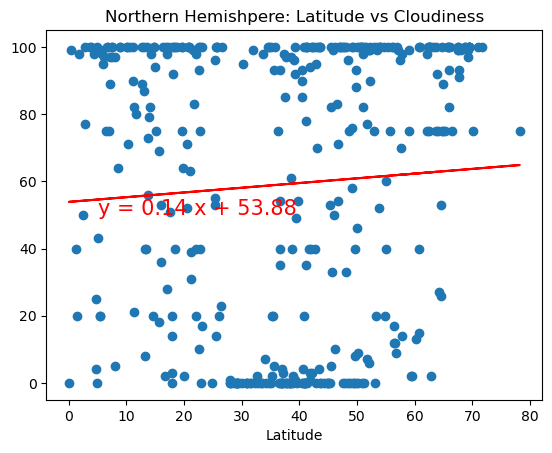

In [41]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
title = 'Northern Hemishpere: Latitude vs Cloudiness'
text_coordinates = (5,50)
plot_linear_regress(x, y, title, text_coordinates)

The r-squared is: 0.009055202605305101


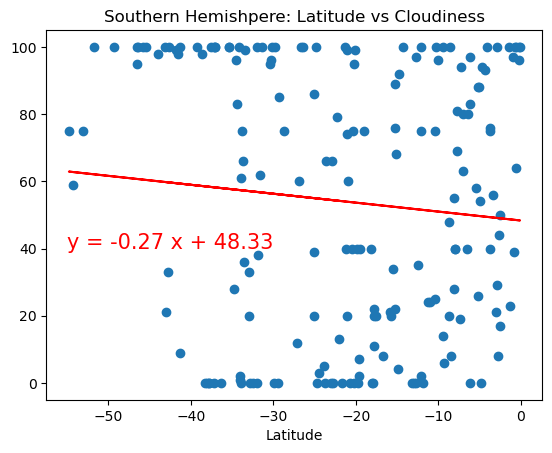

In [45]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
title = 'Southern Hemishpere: Latitude vs Cloudiness'
text_coordinates = (-55,40)
plot_linear_regress(x, y, title, text_coordinates)

**Discussion about the linear relationship:** 
- With both R^2 values being less than 0.01 suggests a very weak relationship between latitude and cloudiness. This means that as latitude changes, the cloudiness tends to not change for both hemispheres. The 99.9% of remaining variability in cloudiness is due to other factors or randomeness, not related to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004334340323127084


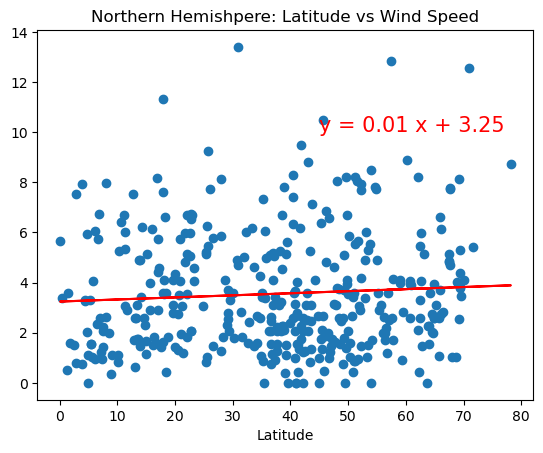

In [47]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
title = 'Northern Hemishpere: Latitude vs Wind Speed'
text_coordinates = (45,10)
plot_linear_regress(x, y, title, text_coordinates)

The r-squared is: 0.04870850116535964


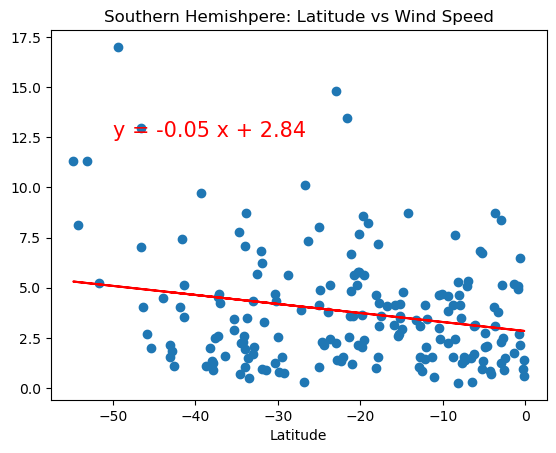

In [49]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
title = 'Southern Hemishpere: Latitude vs Wind Speed'
text_coordinates = (-50,12.5)
plot_linear_regress(x, y, title, text_coordinates)

**Discussion about the linear relationship:** 

- An R^2 value of 0.0085 suggests a very weak relationship between northern hemishpere latitude and wind speed. This means that as latitude changes, the wind speed tends to not change. The 99% of remaining variability in wind speed is due to other factors or randomeness, not related to latitude.
- For the southern hemishpere an R^2 value of 0.13 suggests a weak relationship between southern hemisphere latitude and wind..